In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/Thesis_Resources/Notebooks

/gdrive/My Drive/Thesis_Resources/Notebooks


In [ ]:
import ee
import datetime
import requests
import matplotlib.pyplot as plt
import math

In [ ]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=uUhpKoTnMrdTo7YHP41rDM-L2ruuWiac8_x5HvRNceE&tc=9g8pFTA7RfCko34vhZ0O-p6Zxu3vXBbLvw1ZUeZ4Zkw&cc=jE9gHyFhRepk6vXcVS3GN22c5tJLF6oF67SVQk9npLg

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXneu-dX7UlUIhlN3ajd9-92WBFsZTziHcynMDKq4oaTT2IOMD5mEA4

Successfully saved authorization token.


In [ ]:
ee.Initialize()

In [ ]:
def fetch_and_display_images(lat, lon, before_start, before_end, after_start, after_end, title, region_radius=500, scale=10):
    # Fetch and display 'before' image
    fetch_and_display_image(lat, lon, before_start, before_end, f"{title.replace(' ', '_')}_before.jpg", f"{title} (Before)", region_radius, scale)

    # Fetch and display 'after' image
    fetch_and_display_image(lat, lon, after_start, after_end, f"{title.replace(' ', '_')}_after.jpg", f"{title} (After)", region_radius, scale)

def fetch_and_display_image(lat, lon, start_date, end_date, filename, title, region_radius, scale):
    # Define the region of interest
    region = ee.Geometry.Point([lon, lat])
    square = region.buffer(region_radius).bounds()
    # Fetch the Sentinel-2 image collection
    collection = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                  .filterDate(ee.Date(start_date), ee.Date(end_date))
                  .filterBounds(square)
                  #.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))  # Filter images with cloud cover less than 10%
                  #.sort('CLOUDY_PIXEL_PERCENTAGE')
                  )  # Sort by cloud cover in ascending order

    # Check if there are any images available after filtering
    count = collection.size().getInfo()
    if count == 0:
        print(f"No images available for {title} within the specified cloud cover threshold.")
        return

    # Take the first image (with the least cloud cover) from the sorted collection and clip it to the region
    image = ee.Image(collection.first()).clip(square)

    # Define visualization parameters
    vis_params = {
        'bands': ['B4', 'B3', 'B2'], # RGB bands
        'min': 0,
        'max': 3000,
        'scale': scale
    }

    # Get the URL for the image
    url = image.getThumbURL(vis_params)

    # Download and save the image
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)

   # Display the image using matplotlib
    img = plt.imread(filename)
    plt.imshow(img)

    # Get the shape of the image
    height, width, _ = img.shape

    # Add a red marker at the center of the image
    #plt.plot(width // 2, height // 2, 'ro', markersize=10)

    plt.title(title)
    plt.axis('off')
    plt.show()


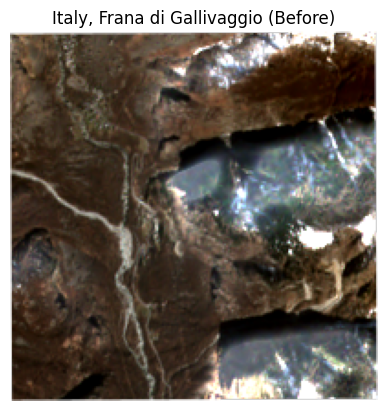

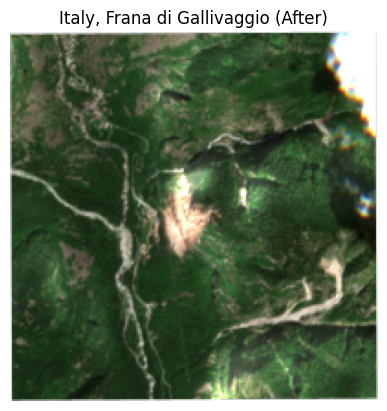

In [ ]:
# Italy Fiumelatte
fetch_and_display_images(46.36283658715359, 9.367911876892926, '2018-04-01', '2018-05-28', '2018-05-29', '2018-06-10', 'Italy, Frana di Gallivaggio', region_radius= 1000)

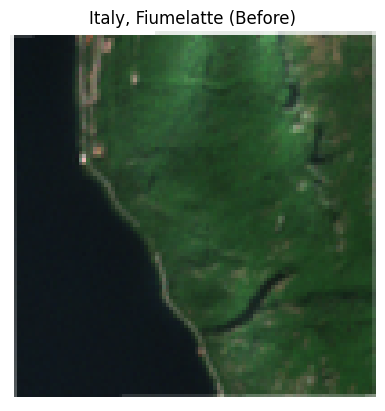

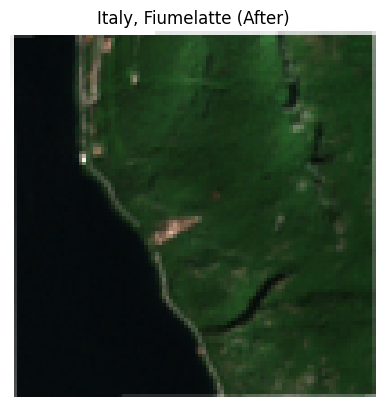

In [ ]:
# Italy Fiumelatte
fetch_and_display_images(45.985518, 9.296162, '2023-05-05', '2023-05-07', '2023-05-25', '2023-05-27', 'Italy, Fiumelatte')

In [ ]:
def fetch_and_display_images(lat, lon, before_start, before_end, after_start, after_end, title, region_radius=500, scale=10):
    # Fetch and display 'before' image
    fetch_and_display_image(lat, lon, before_start, before_end, f"{title.replace(' ', '_')}_before.jpg", f"{title} (Before)", region_radius, scale)

    # Fetch and display 'after' image
    fetch_and_display_image(lat, lon, after_start, after_end, f"{title.replace(' ', '_')}_after.jpg", f"{title} (After)", region_radius, scale)

def fetch_and_display_image(lat, lon, start_date, end_date, filename, title, region_radius, scale):
    # Define the region of interest
    region = ee.Geometry.Point([lon, lat])
    square = region.buffer(region_radius).bounds()

    # Fetch the Sentinel-2 image collection
    collection = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                  .filterDate(ee.Date(start_date), ee.Date(end_date))
                  .filterBounds(square))

    # Check if there are any images available after filtering
    count = collection.size().getInfo()
    if count == 0:
        print(f"No images available for {title}.")
        return

    # Take the first image from the collection and clip it to the region
    image = ee.Image(collection.first()).clip(square)

    # Calculate NDVI
    ndvi = image.normalizedDifference(['B8', 'B4'])

    # Define visualization parameters for NDVI
    ndvi_vis_params = {
        'min': -1,
        'max': 1,
        'palette': ['blue', 'white', 'green'],
        'scale': scale
    }

    # Get the URL for the NDVI image
    url = ndvi.getThumbURL(ndvi_vis_params)

    # Download and save the NDVI image
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)

    # Display the NDVI image using matplotlib
    img = plt.imread(filename)
    plt.imshow(img, cmap='RdYlGn')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
fetch_and_display_images(46.36283658715359, 9.367911876892926, '2018-04-01', '2018-05-28', '2018-05-29', '2018-06-10', 'Italy, Frana di Gallivaggio', region_radius= 1000)

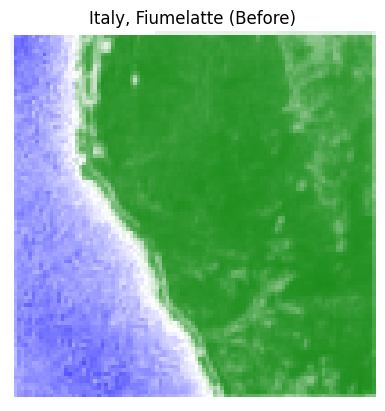

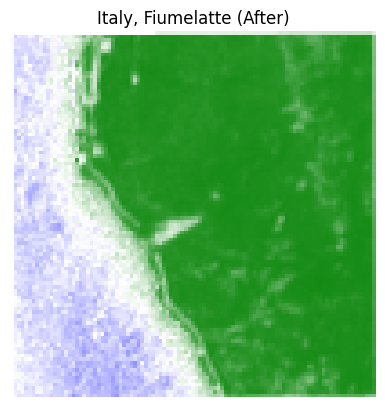

In [ ]:
# Italy Fiumelatte
fetch_and_display_images(45.985518, 9.296162, '2023-05-05', '2023-05-07', '2023-05-25', '2023-05-27', 'Italy, Fiumelatte')

In [ ]:
# Importing all necessary libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Define file paths for the images
img1_path = 'Italy,_Fiumelatte_before.jpg'
img2_path = 'Italy,_Fiumelatte_after.jpg'

In [ ]:
# Load the images
img1_np = np.array(Image.open(img1_path).convert('RGB'))
img2_np = np.array(Image.open(img2_path).convert('RGB'))

# Flatten the images to prepare dataset
img1_flatten = img1_np.reshape(-1, 3)
img2_flatten = img2_np.reshape(-1, 3)

# Create a dataset combining the pixel values of both images
X = np.hstack((img1_flatten, img2_flatten))

# Define a threshold for image differencing
threshold = 100

# Use simple image differencing to create labels
y = np.any(np.abs(img1_flatten - img2_flatten) > threshold, axis=1).astype(int)

# Split data for training and testing
split_ratio = 0.8
split_idx = int(len(X) * split_ratio)

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classificationRep = classification_report(y_test, y_pred)

print(accuracy)
print(classificationRep)

0.9946627850557982
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1148
           1       0.99      1.00      0.99       913

    accuracy                           0.99      2061
   macro avg       0.99      0.99      0.99      2061
weighted avg       0.99      0.99      0.99      2061



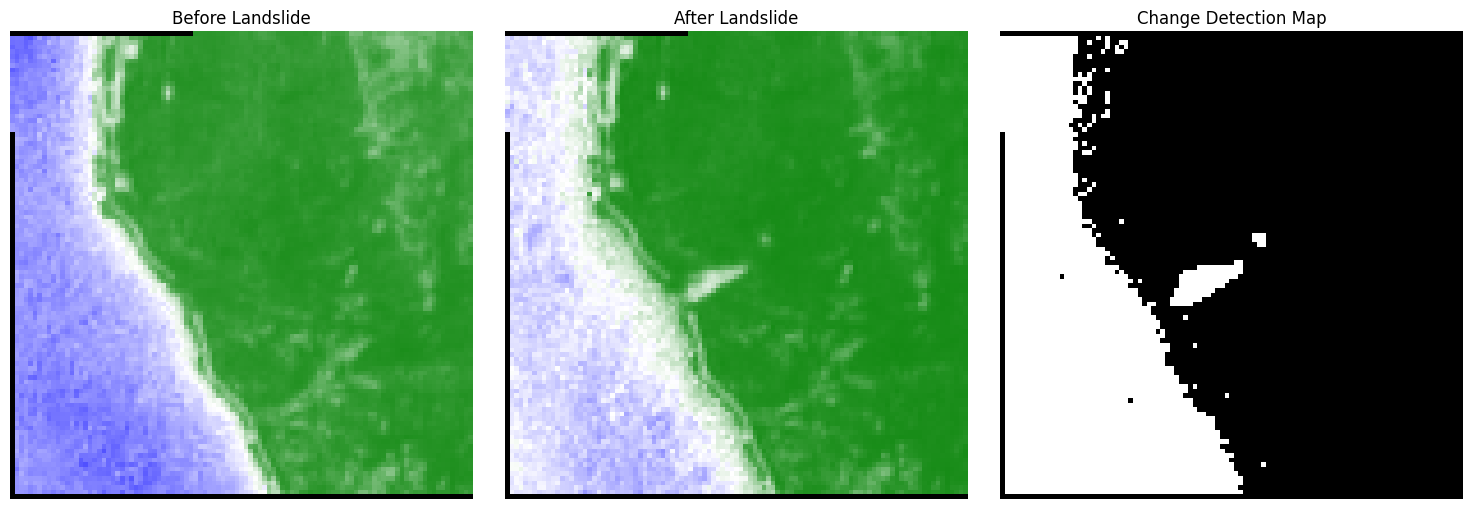

In [ ]:
# Predict changes for the entire dataset
y_full_pred = clf.predict(X)

# Reshape the predictions to obtain a change map
change_map = y_full_pred.reshape(img1_np.shape[:2])

# Visualize the original images and the change map
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display "before" image
ax[0].imshow(img1_np)
ax[0].set_title('Before Landslide')
ax[0].axis('off')

# Display "after" image
ax[1].imshow(img2_np)
ax[1].set_title('After Landslide')
ax[1].axis('off')

# Display change map
ax[2].imshow(change_map, cmap='gray')
ax[2].set_title('Change Detection Map')
ax[2].axis('off')

plt.tight_layout()
plt.show()